### Виконав: Овчар Антон, КА-64
# Лабараторна робота №7
## Задача Коші
#### 1. Умова: 
$\begin{cases} y'=3x-\frac{y}{x} \\ y(1)=1 \end{cases}$
#### 2. Аналітичний розв'язок
$y'+\frac{y}{x}=3x \\
Замена: y=uv; y'=u'v+uv' \\
u'v+uv'+\frac{uv}{x}=3x \\
u'v+u(v'+\frac{v}{x}=3z \\
\begin{cases} u(v'+\frac{v}{x})=0 \\ uv'=3x \end{cases} \\
1.\quad v'=-\frac{v}{x} \\
\qquad \frac{dv}{v}=-\frac{1}{x}dx \\
\qquad \int\frac{dv}{v}=\int-\frac{1}{x}dx \\
\qquad \ln{v}=-\ln{x} \\
\qquad v=\frac{1}{x} \\
2.\quad u'v=3x \\
\qquad \frac{u'}{x}=3x \\
\qquad u'=3x^2 \\
\qquad u=\int3x^2dx=c+x^3 \\
y=uv=\frac{1}{x}(c+x^3)=\frac{c}{x}+x^2 \\
y(1)=\frac{c}{1}+1^2=c+1=1 \Rightarrow c=0 \\
Ответ: y=x^2
$
#### 3. Чисельний розв'язок

In [7]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import random
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 7.5) # set default size of plots

##### Умова та точний розв'язок задачі

In [8]:
def f(x, y):
    return 3*x-y/x

def real_y(x):
    return x**2

##### Метод Рунге-Кутта

In [9]:
def runge_kutta(x0, y0, h, n):
    results = []
    x = x0
    y = y0
    for i in range(n+1):
        results.append(y)
        
        k1 = f(x, y)
        k2 = f(x+h/2, y+h/2*k1)
        k3 = f(x+h/2, y+h/2*k2)
        k4 = f(x+h, y+h*k3)
        x = x + h
        y = y + h / 6 * (k1 + 2*k2 + 2*k3 + k4)
    return results

##### Метод Адамса 4-го порядку

In [10]:
def adams(x0, y0, h, n):
    x0, x1, x2, x3 = [x0+i*h for i in range(4)]
    y0, y1, y2, y3 = runge_kutta(x0, y0, h, 3)
    results = []
    for i in range(n+1):
        results.append(y0)
        
        y4 = y3 + h / 24 * (55 * f(x3, y3) - 59 * f(x2, y2) + 37 * f(x1, y1) - 9 * f(x0, y0))
        x0, x1, x2, x3 = x1, x2, x3, x3 + h
        y0, y1, y2, y3 = y1, y2, y3, y4
    
    return results

##### Тест результатів роботи

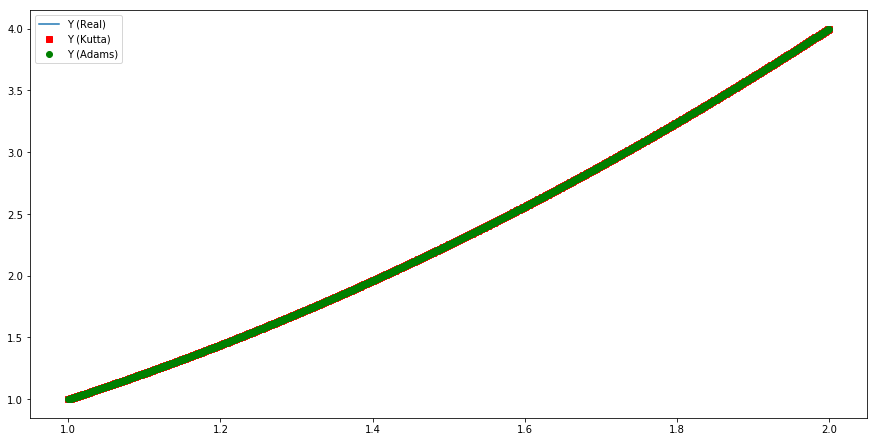

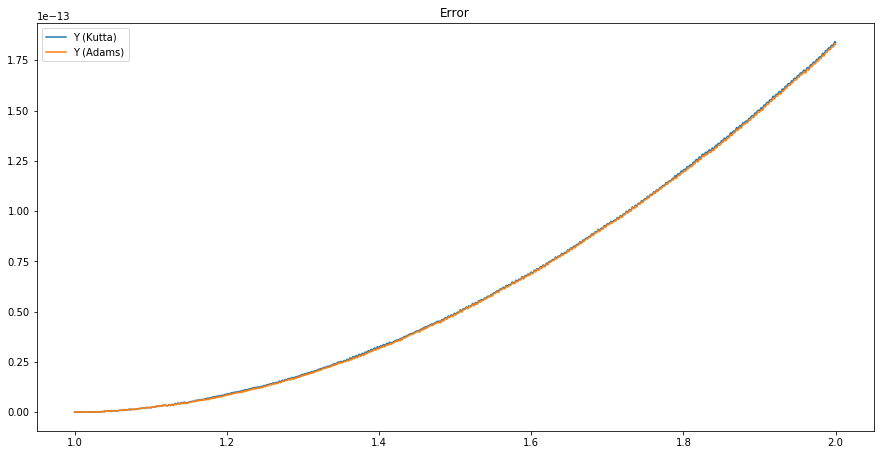

In [11]:
N = 1000
X0 = 1
X_END = X0 + 1
Y0 = 1
H = (X_END - X0) / N

res = pd.DataFrame({
    'X': [X0+i*H for i in range(N+1)],
    'Y (Kutta)': runge_kutta(X0, Y0, H, N),
    'Y (Adams)': adams(X0, Y0, H, N),
    'Y (Real)': [real_y(X0+i*H) for i in range(N+1)],
    'Error (Kutta)': np.fabs(runge_kutta(X0, Y0, H, N) - np.array([real_y(X0+i*H) for i in range(N+1)])),
    'Error (Adams)': np.fabs(adams(X0, Y0, H, N) - np.array([real_y(X0+i*H) for i in range(N+1)]))
})

plt.figure(1)
plt.plot(res['X'], res['Y (Real)'])
plt.plot(res['X'], res['Y (Kutta)'], 'rs')
plt.plot(res['X'], res['Y (Adams)'], 'go')
plt.legend()
plt.figure(2)
plt.plot(res['X'], res['Error (Kutta)'], label='Y (Kutta)')
plt.plot(res['X'], res['Error (Adams)'], label='Y (Adams)')
plt.legend()
plt.title('Error')
plt.show()

In [12]:
display(res)

,X,Y (Kutta),Y (Adams),Y (Real),Error (Kutta),Error (Adams)
0,1.000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00
1,1.001,1.002001,1.002001,1.002001,2.220446e-16,2.220446e-16
2,1.002,1.004004,1.004004,1.004004,0.000000e+00,0.000000e+00
3,1.003,1.006009,1.006009,1.006009,2.220446e-16,2.220446e-16
4,1.004,1.008016,1.008016,1.008016,0.000000e+00,0.000000e+00
5,1.005,1.010025,1.010025,1.010025,2.220446e-16,2.220446e-16
6,1.006,1.012036,1.012036,1.012036,0.000000e+00,0.000000e+00
7,1.007,1.014049,1.014049,1.014049,2.220446e-16,2.220446e-16
8,1.008,1.016064,1.016064,1.016064,0.000000e+00,0.000000e+00
9,1.009,1.018081,1.018081,1.018081,2.220446e-16,2.220446e-16


#### Висновок
В цій лабораторній роботі ми освоїли 2 чисельних методу розв’язку задачі Коші з доволі гарною точністю. Виявилося, що метод Адамса трохи точніший за метод Рунге-Кутта.